# Task 3 Sales Prediction

## Successfully implemented a Linear Regression model to predict ‘Sales’ based on features like ‘TV’, ‘Radio’, and ‘Newspaper’.The model’s performance was evaluated using metrics like Mean Squared Error, and then used to make predictions on new data
* ### Importing Libraries: Started by importing necessary Python libraries such as pandas, numpy, matplotlib, seaborn, and sklearn.
* ### Correlation Matrix: Computed the correlation matrix of your data to understand the relationship between different variables.
* ### Heatmap: Visualized the correlation matrix using a heatmap, which is a graphical representation of data where individual values are represented as colors.
* ### Boxplot: Created a boxplot for the 'Sales' variable. Boxplots are used to display the summary of the set of data values having properties like minimum, first quartile, median, third quartile, and maximum.
* ### Pairplot: Created a pairplot for data. Pairplots are a great method to identify trends for follow-up analysis and, fortunately, are easily implemented in Python.
* ### Data Preprocessing: Scaled data and transformed it using StandardScaler and ColumnTransformer.
* ### Model Training: Trained a Linear Regression model on training data.
* ### Model Evaluation: Evaluated model by computing the model score on both training and testing data.
* ### Prediction: Finally, used our trained model to make predictions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("advertising.csv")
data.head(15)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [3]:
data.shape

(200, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
data["Sales"].value_counts()

Sales
11.9    5
16.7    5
20.7    4
11.0    3
11.3    3
       ..
13.4    1
24.2    1
8.1     1
5.5     1
25.5    1
Name: count, Length: 121, dtype: int64

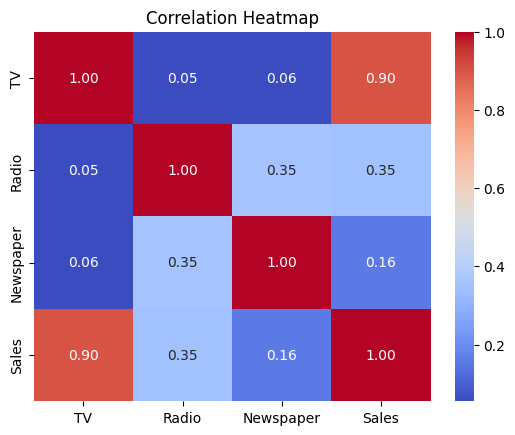

In [7]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

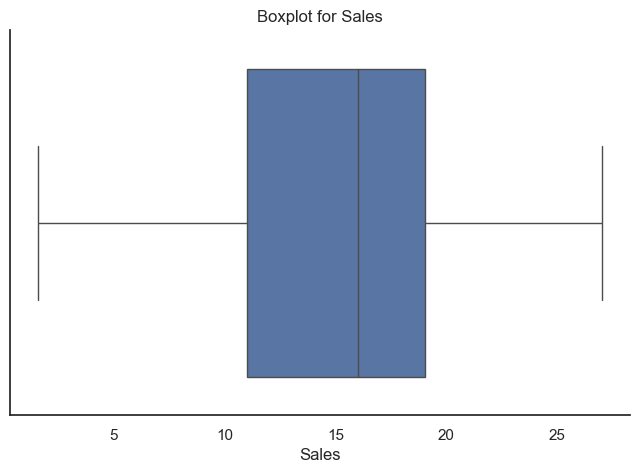

In [8]:
# Set the style of the plot
sns.set(style="white")

# Create a figure
plt.figure(figsize=(8, 5))

# Create a boxplot
boxplot = sns.boxplot(x=data['Sales'])

# Remove the top and right spines from plot
sns.despine()

# title to the plot
plt.title('Boxplot for Sales')

# label to the x-axis
plt.xlabel('Sales')

# Show the plot
plt.show()


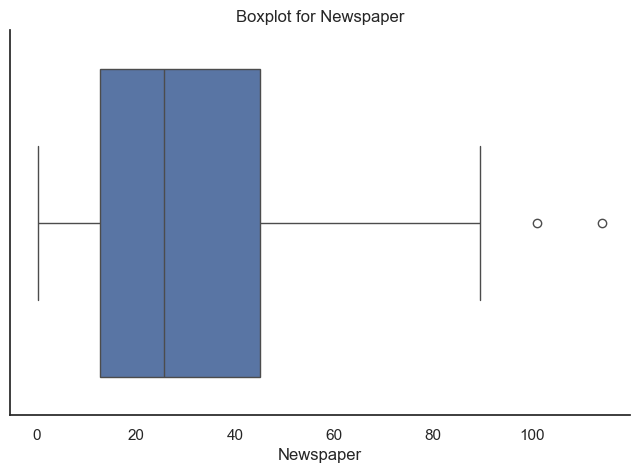

In [9]:

# Set the style of the plot
sns.set(style="white")

# Create a figure
plt.figure(figsize=(8, 5))

# Create a boxplot
boxplot = sns.boxplot(x=data['Newspaper'])

# Remove the top and right spines from plot
sns.despine()

# Add a title to the plot
plt.title('Boxplot for Newspaper')

# Add a label to the x-axis
plt.xlabel('Newspaper')

# Show the plot
plt.show()

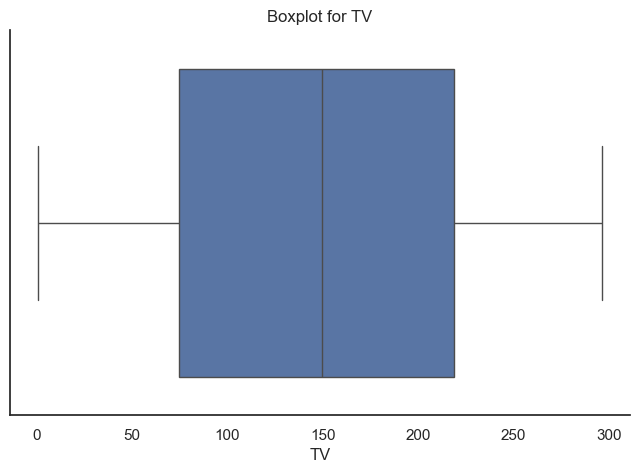

In [10]:
sns.set(style="white")

# Create a figure
plt.figure(figsize=(8, 5))

# Create a boxplot
boxplot = sns.boxplot(x=data['TV'])

# Remove the top and right spines from plot
sns.despine()

# Add a title to the plot
plt.title('Boxplot for TV')

# Add a label to the x-axis
plt.xlabel('TV')

# Show the plot
plt.show()


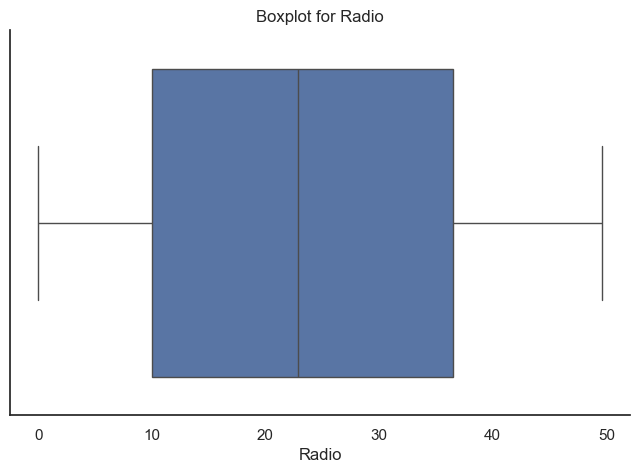

In [11]:
sns.set(style="white")

# Create a figure
plt.figure(figsize=(8, 5))

# Create a boxplot
boxplot = sns.boxplot(x=data['Radio'])

# Remove the top and right spines from plot
sns.despine()

# Add a title to the plot
plt.title('Boxplot for Radio')

# Add a label to the x-axis
plt.xlabel('Radio')

# Show the plot
plt.show()

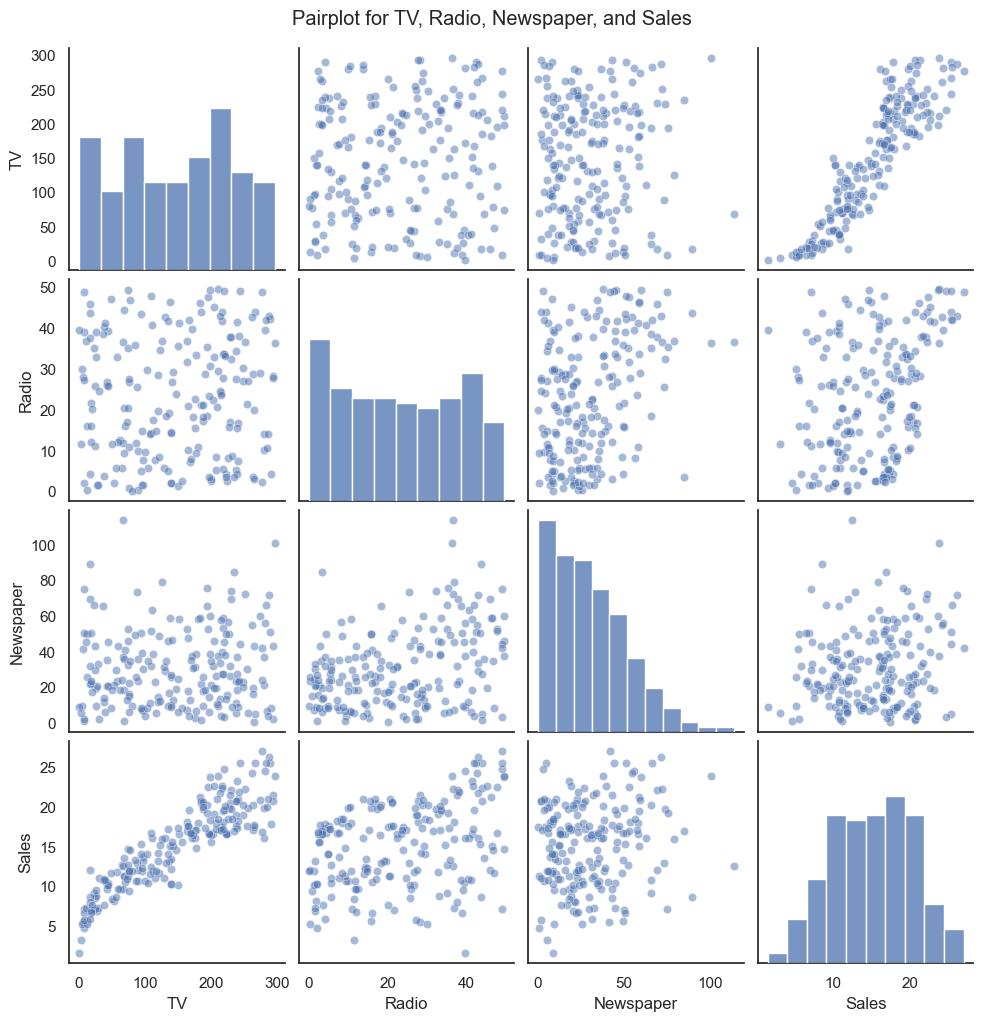

In [12]:
# Set the style of the plot
sns.set(style="white")

# Create a pairplot
pairplot = sns.pairplot(data, plot_kws={'alpha':0.5})

# Remove the top and right spines from plot
sns.despine()

# Add a title to the plot
pairplot.fig.suptitle('Pairplot for TV, Radio, Newspaper, and Sales', y=1.02)

# Show the plot
plt.show()


Text(0.5, 1.0, 'Sales Distribution')

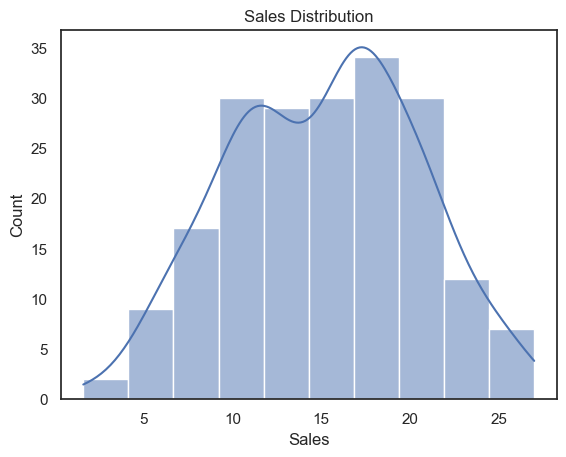

In [13]:
sns.histplot(data['Sales'], bins=10, kde=True)
plt.title('Sales Distribution')

Text(0.5, 1.0, 'TV Budget Distribution')

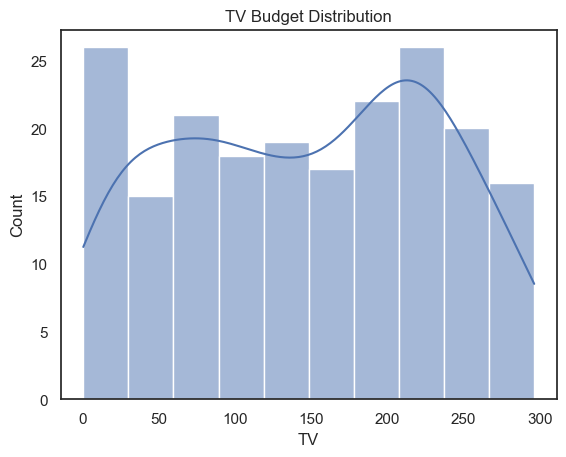

In [14]:
sns.histplot(data['TV'], bins=10, kde=True)
plt.title('TV Budget Distribution')

Text(0.5, 1.0, 'Radio Budget Distribution')

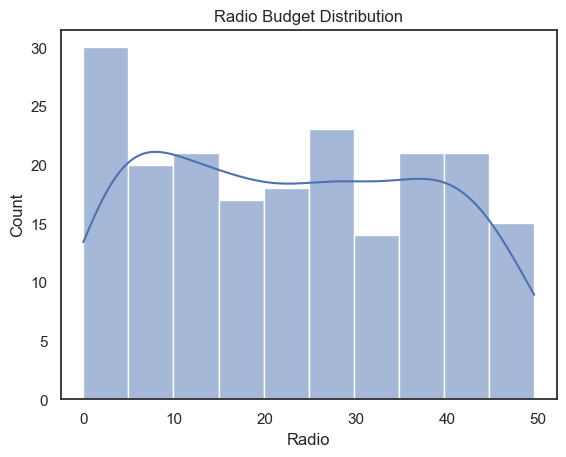

In [15]:
sns.histplot(data['Radio'], bins=10, kde=True)
plt.title('Radio Budget Distribution')

Text(0.5, 1.0, 'Newspaper Budget Distribution')

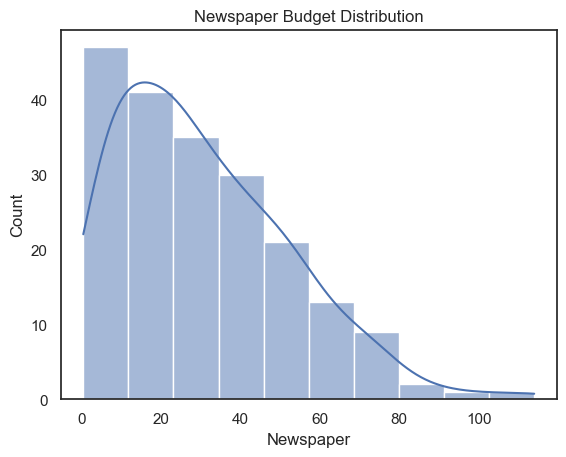

In [16]:
sns.histplot(data['Newspaper'], bins=10, kde=True)
plt.title('Newspaper Budget Distribution')

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Load the data
data = pd.read_csv('advertising.csv')

scaler = StandardScaler()
numeric = ["TV","Radio","Newspaper"]
transformer = ColumnTransformer([("num",scaler, numeric)])

x = data.drop("Sales" ,axis = 1)
y = data["Sales"]

transform = transformer.fit_transform(x)


In [19]:
x_train ,x_test ,y_train ,y_test = train_test_split (transform ,y ,test_size = 0.5 ,random_state = 42)

In [20]:
x_train.shape

(100, 3)

In [21]:
x_test.shape

(100, 3)

In [22]:
y_train.shape

(100,)

In [23]:
y_test.shape

(100,)

In [25]:
from sklearn.metrics import mean_squared_error

# Create and fit the model
ls = LinearRegression()
ls.fit(x_train, y_train)

y_pred = ls.predict(x_test)
train_predict = ls.predict(x_train)

# Print model scores
print("Model Score on Training data:", ls.score(x_train, y_train))
print("Model Score on Testing data:", ls.score(x_test, y_test))

# Make predictions and display regression metrics
regression_metrics = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", regression_metrics)

Model Score on Training data: 0.8911171517862451
Model Score on Testing data: 0.907313434112335
Mean Squared Error: 2.579099719106539


In [26]:
#Random data for testing
new_data = {
    'TV': [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8],
    'Radio': [37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6, 2.1, 2.6],
    'Newspaper': [69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11.6, 1.0, 21.2]
}

In [27]:
# Preprocess the input data
new_data_df = pd.DataFrame(new_data)
new_data_df

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
5,8.7,48.9,75.0
6,57.5,32.8,23.5
7,120.2,19.6,11.6
8,8.6,2.1,1.0
9,199.8,2.6,21.2


In [28]:
new_data_transformed = transformer.transform(new_data_df)

In [29]:
# Make predictions  from linear Regression
predicted_labels = ls.predict(new_data_transformed)
print("Predicted Labels:", predicted_labels)

Predicted Labels: [21.57804685 11.40249917 10.80918948 17.5529331  16.07204179 10.70250628
 11.25206238 13.22200859  5.28506179 15.93037797]


### Conclusion:- Successfully carried out a data analysis pipeline starting from visualizing the data using various plots, preprocessing the data, and finally, training a machine learning model and making predictions. The model's performance was evaluated based on its score on the training and testing data. The Mean Squared Error was also computed to measure the average squared difference between the predicted and actual values, providing an assessment of the prediction error of the model³. The final step involved using the trained model to predict new data. This entire process aids in understanding the underlying patterns and relationships within the data, which is crucial in making informed decisions or predictions.